<a href="https://colab.research.google.com/github/Abhi926572/Abhishek-Athmakuri/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')



import numpy as np
import pandas as pd



import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))

In [5]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
housing.shape

(545, 13)

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
housing.isnull().sum()*100/housing.shape[0]

,0
price,0.0
area,0.0
bedrooms,0.0
bathrooms,0.0
stories,0.0
mainroad,0.0
guestroom,0.0
basement,0.0
hotwaterheating,0.0
airconditioning,0.0


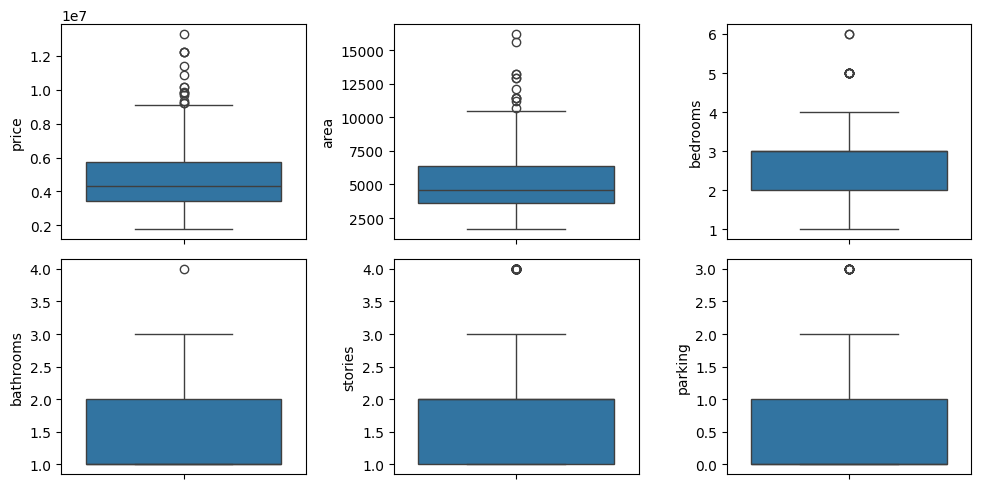

In [10]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

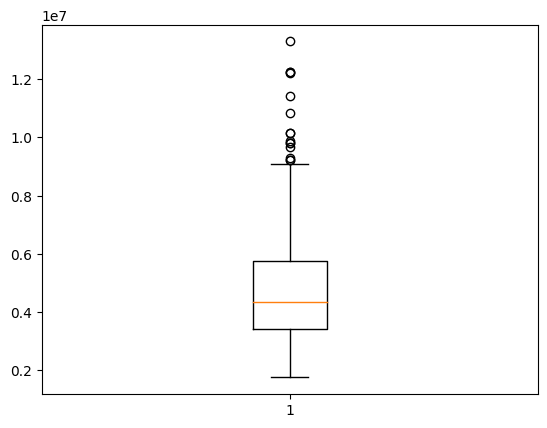

In [12]:
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

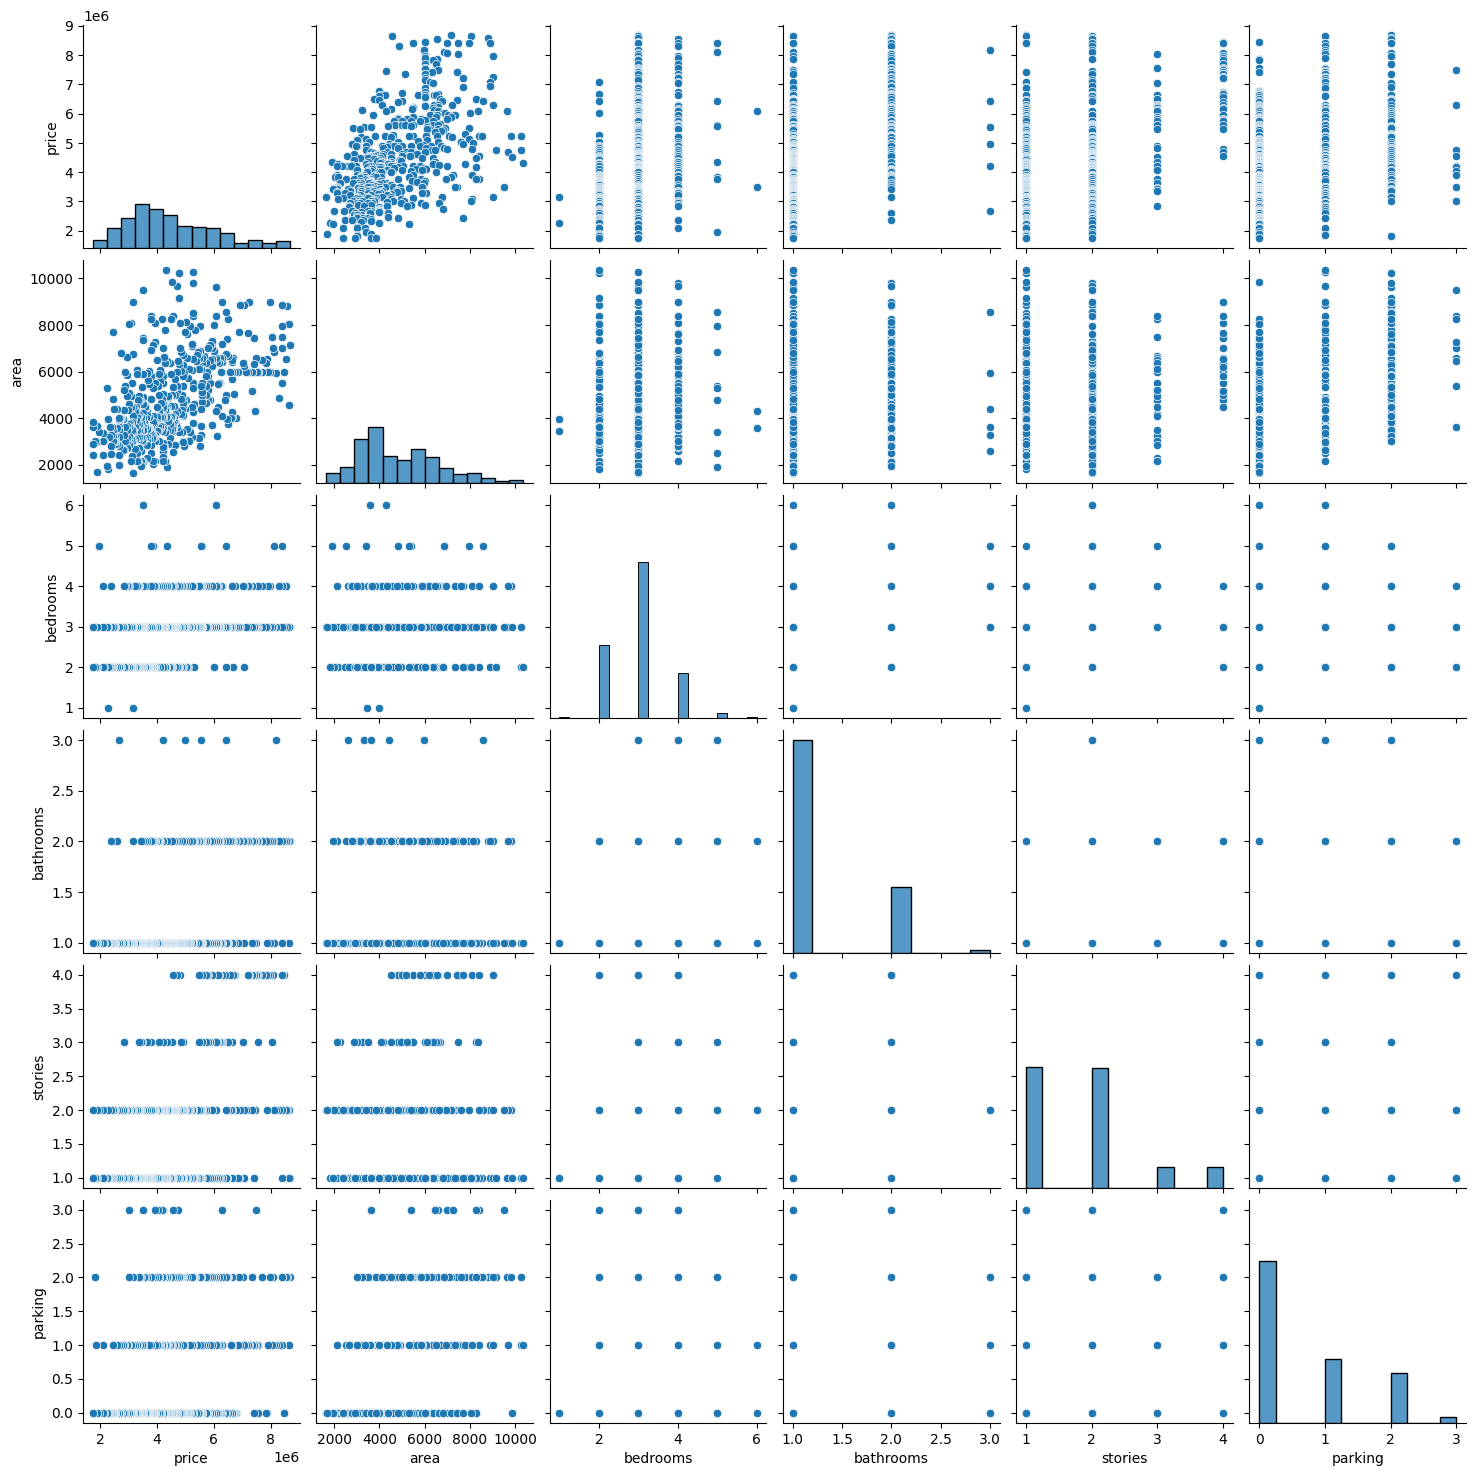

In [18]:
sns.pairplot(housing)
plt.show()

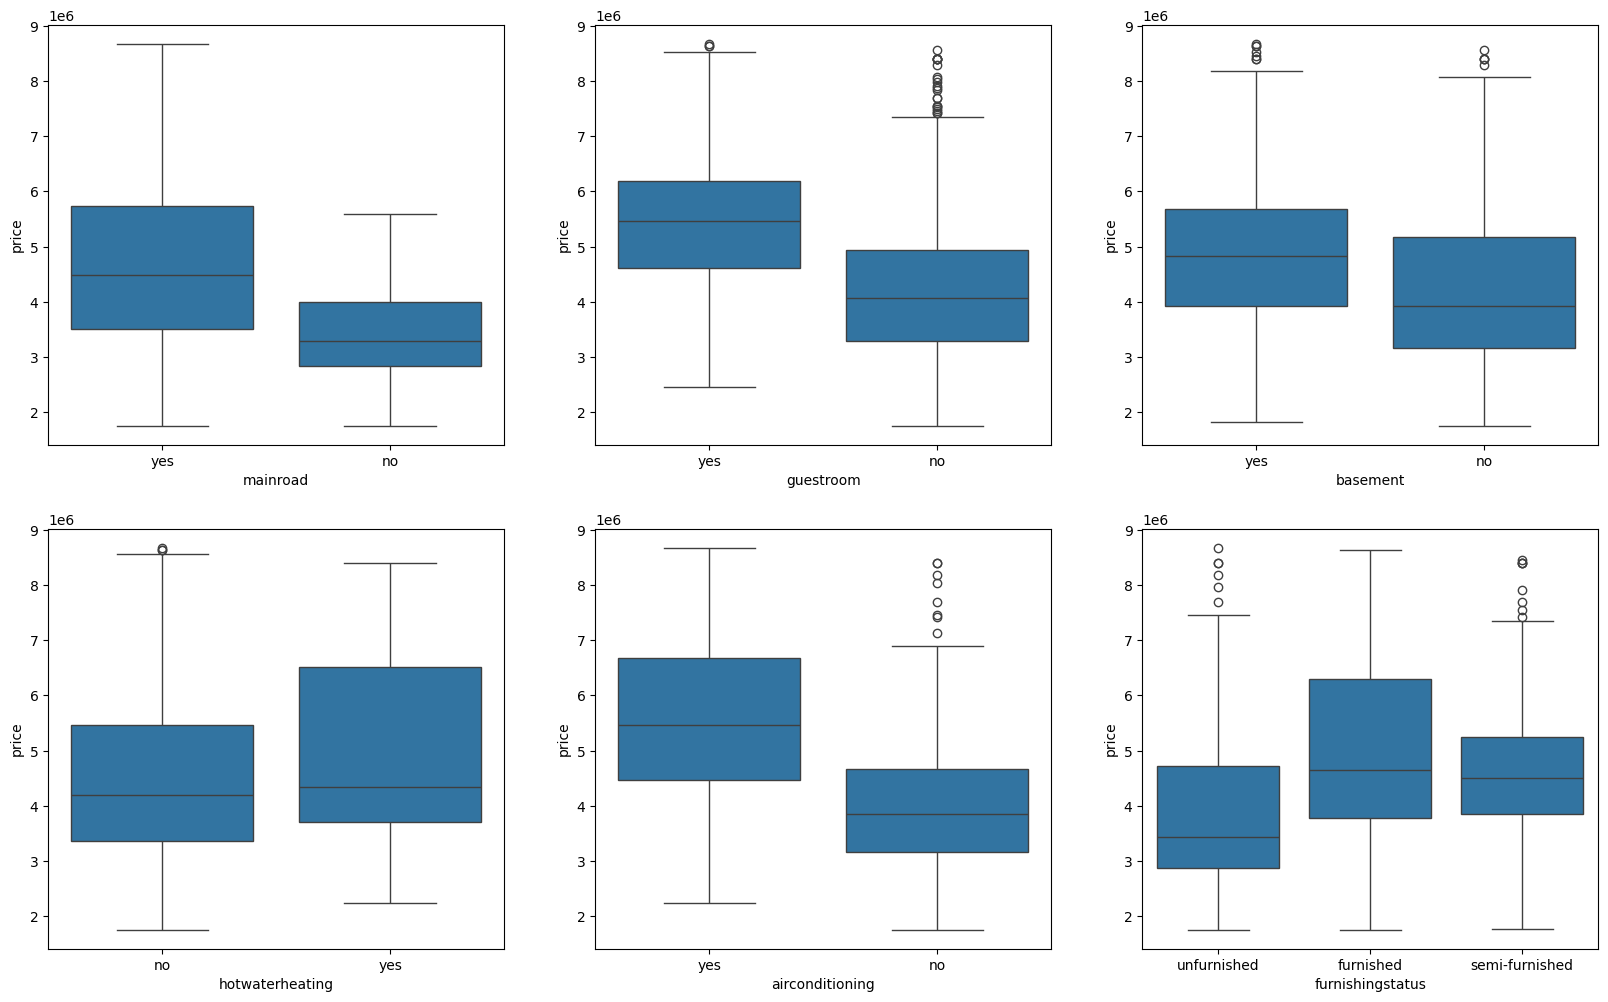

In [19]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

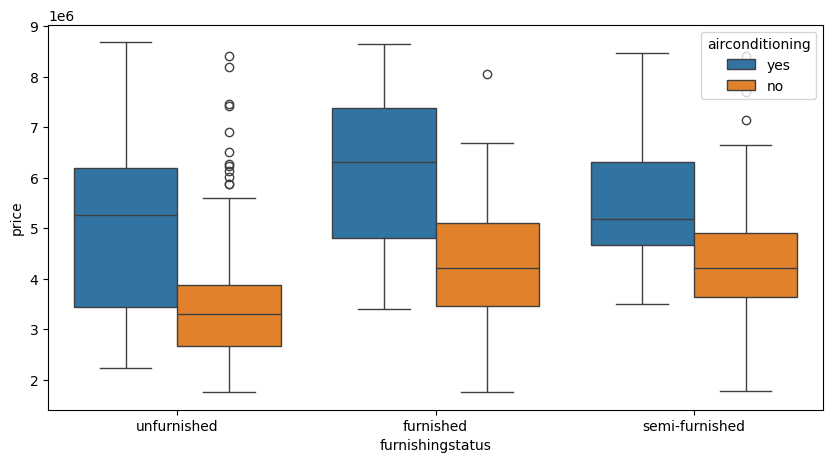

In [20]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

In [21]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


def binary_map(x):
    return x.map({'yes': 1, "no": 0})


    housing[varlist] = housing[varlist].apply(binary_map)

In [22]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
21,8680000,7155,3,2,1,yes,yes,yes,no,yes,2,no,unfurnished
22,8645000,8050,3,1,1,yes,yes,yes,no,yes,1,no,furnished
23,8645000,4560,3,2,2,yes,yes,yes,no,yes,1,no,furnished
24,8575000,8800,3,2,2,yes,no,no,no,yes,2,no,furnished
25,8540000,6540,4,2,2,yes,yes,yes,no,yes,2,yes,furnished


In [23]:
status = pd.get_dummies(housing['furnishingstatus'])

In [24]:
status.head()

,furnished,semi-furnished,unfurnished
21,False,False,True
22,True,False,False
23,True,False,False
24,True,False,False
25,True,False,False


In [25]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [26]:
housing = pd.concat([housing, status], axis = 1)

In [27]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
21,8680000,7155,3,2,1,yes,yes,yes,no,yes,2,no,unfurnished,False,True
22,8645000,8050,3,1,1,yes,yes,yes,no,yes,1,no,furnished,False,False
23,8645000,4560,3,2,2,yes,yes,yes,no,yes,1,no,furnished,False,False
24,8575000,8800,3,2,2,yes,no,no,no,yes,2,no,furnished,False,False
25,8540000,6540,4,2,2,yes,yes,yes,no,yes,2,yes,furnished,False,False


In [28]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [29]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
21,8680000,7155,3,2,1,yes,yes,yes,no,yes,2,no,False,True
22,8645000,8050,3,1,1,yes,yes,yes,no,yes,1,no,False,False
23,8645000,4560,3,2,2,yes,yes,yes,no,yes,1,no,False,False
24,8575000,8800,3,2,2,yes,no,no,no,yes,2,no,False,False
25,8540000,6540,4,2,2,yes,yes,yes,no,yes,2,yes,False,False


In [30]:
from sklearn.model_selection import train_test_split


np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
101,6230000,5500,3,1,3,yes,no,no,no,no,1,yes,False,True
487,2870000,5400,4,1,2,yes,no,no,no,no,0,no,False,True
249,4543000,4990,4,2,2,yes,yes,yes,no,no,0,yes,False,False
110,6090000,6600,3,1,1,yes,yes,yes,no,no,2,yes,True,False
499,2660000,3630,3,3,2,no,yes,no,no,no,0,no,False,True


In [34]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,3.570000e+02,357.000000,357.000000,357.000000,357.000000,357.000000
mean,4.483361e+06,4925.728291,2.935574,1.246499,1.792717,0.649860
std,1.503671e+06,1789.437703,0.741086,0.462978,0.875158,0.840065
min,1.750000e+06,1650.000000,2.000000,1.000000,1.000000,0.000000
25%,3.360000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.200000e+06,4500.000000,3.000000,1.000000,2.000000,0.000000
75%,5.460000e+06,6050.000000,3.000000,1.000000,2.000000,1.000000
max,8.680000e+06,10360.000000,6.000000,3.000000,4.000000,3.000000


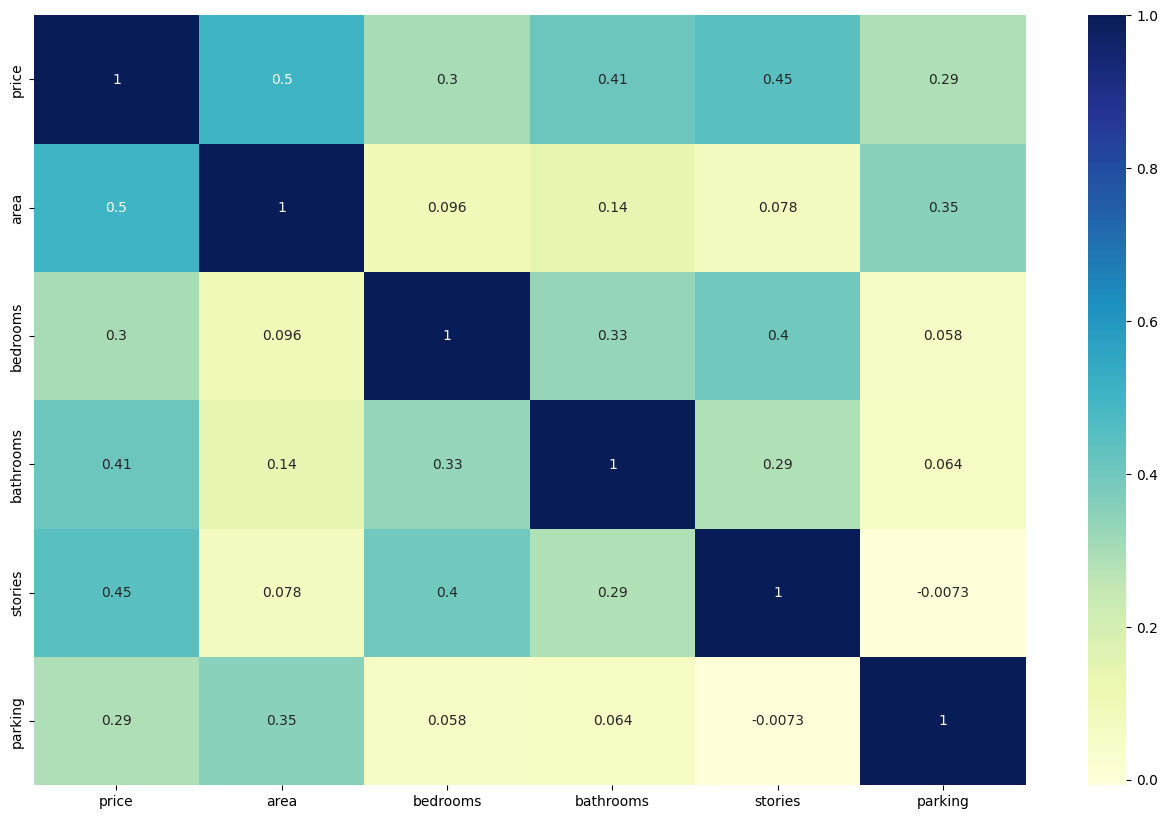

In [37]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.select_dtypes(include=np.number).corr(), annot = True, cmap="YlGnBu")
plt.show()

In [38]:
y_train = df_train.pop('price')
X_train = df_train

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [45]:


lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [47]:
rfe = RFE(lm, n_features_to_select=6)
rfe = rfe.fit(X_train, y_train)

In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', False, 8),
 ('bedrooms', False, 7),
 ('bathrooms', True, 1),
 ('stories', False, 3),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 5),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 4),
 ('prefarea', True, 1),
 ('semi-furnished', False, 6),
 ('unfurnished', False, 2)]

In [49]:
col = X_train.columns[rfe.support_]
col

Index(['bathrooms', 'mainroad', 'guestroom', 'hotwaterheating',
       'airconditioning', 'prefarea'],
      dtype='object')

In [50]:
X_train.columns[~rfe.support_]

Index(['area', 'bedrooms', 'stories', 'basement', 'parking', 'semi-furnished',
       'unfurnished'],
      dtype='object')

In [51]:
X_train_rfe = X_train[col]

In [52]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [53]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [54]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     58.05
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           1.26e-49
Time:                        06:49:13   Log-Likelihood:                -5460.5
No. Observations:                 357   AIC:                         1.094e+04
Df Residuals:                     350   BIC:                         1.096e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.758e+06   2.13e+05     

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.11
3,guestroom,1.07
6,prefarea,1.07
1,bathrooms,1.05
2,mainroad,1.05
5,airconditioning,1.05
4,hotwaterheating,1.02


In [57]:
y_train_price = lm.predict(X_train_rfe)

In [58]:
res = (y_train_price - y_train)

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

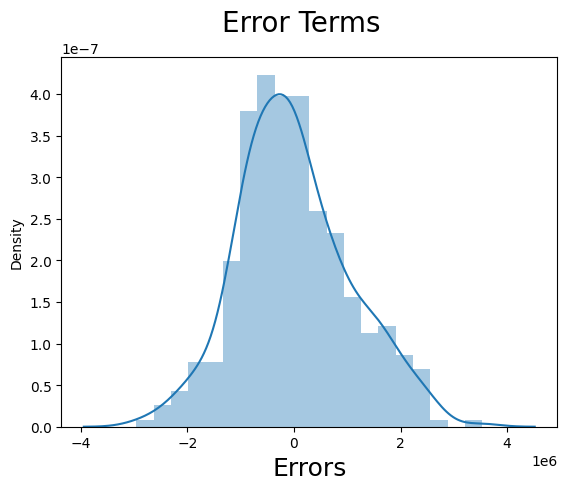

In [60]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

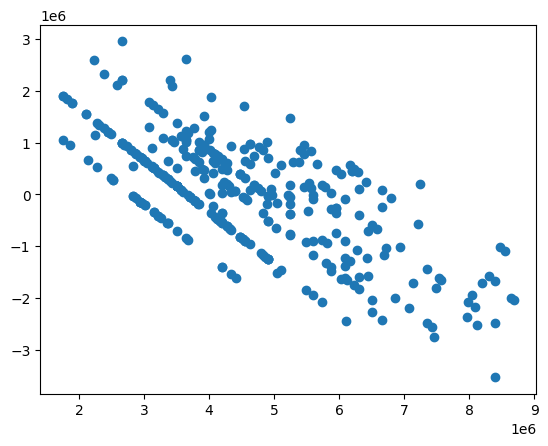

In [61]:
plt.scatter(y_train,res)
plt.show()

In [62]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [77]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']


for col in ['airconditioning', 'prefarea']:
    if df_test[col].dtype == object:
            df_test[col] = df_test[col].map({'yes': 1, 'no': 0})

            # Apply scaler
            scaler = MinMaxScaler()
            df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [74]:
y_test = df_test.pop('price')
X_test = df_test

In [75]:
X_test = sm.add_constant(X_test)

In [76]:
X_test_rfe = X_test[X_train_rfe.columns]